<a href="https://colab.research.google.com/github/JainAnki/SiameseNetworks/blob/main/LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [344]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [345]:
X_train = [[0.346,0.780], [0.303,0.439],[0.358,0.729],[0.602,0.863],[0.790,0.753],[0.611,0.965]]
y_train = [0,0,0,1,1,1]

X_test = [[0.959,0.382], [0.750,0.306], [0.395,0.760], [0.823,0.764], [0.761,0.874], [0.844,0.435]]
y_test = [0,0,0,1,1,1]

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [346]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):

    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

def plot_decision_boundary(X, y, w, b):

    # The Line is y=mx+c
    # So, Equate mx+c = w.X + b
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 =np.multiply(x1,m) + c
    
    # Plotting
    fig = plt.figure
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title('Decision Boundary')   
    plt.plot(x1, x2, 'y-')


In [347]:
def train(X, y, epochs, lr):
 
    m, n = X.shape
    
    # Initializing weights and bias.
    w = np.array([1.5,0.5])
    b = -1
    
    # Empty list to store losses.
    losses = []
    # Training loop.
    for epoch in range(epochs):
        for i in range(m):
            xb = X[i]
            yb = y[i]
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w = w- lr*dw
            b = b- lr*db
            #print('The logistic model P(y=1|x1,x2) is: ',y_hat)
            #print('The updated value of w,b is: ')
            #print(w,b)
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        if epoch == 1:
          print("Solution to 5b(i)")
          print('The updated value of w,b at the end of the epoch is:  \n',w,b)
          print("\n\n Solution to 5b(ii)")
          print('The logistic model P(y=1|x1,x2) is: \n', y_hat)
          print("Corresponding cross entropy function = \n",l)
        
    # returning weights, bias and losses(List).
    return w, b, losses   

In [348]:
def predict(X):
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []    
    # if y_hat >= 0.5 --> round up to 1
    # if y_hat < 0.5 --> round up to 1
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    
    return np.array(pred_class)

Solution to 5b(i)
The updated value of w,b at the end of the epoch is:  
 [1.53612616 0.51739964] -1.0117732408457443


 Solution to 5b(ii)
The logistic model P(y=1|x1,x2) is: 
 0.5936978427941283
Corresponding cross entropy function = 
 -0.0634715627032198


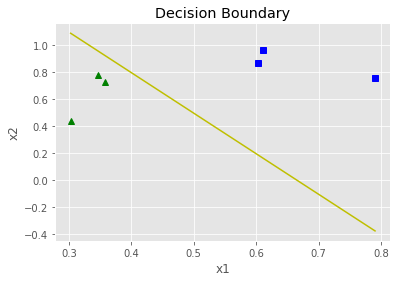

In [349]:
# Training 
w, b, l = train(X_train, y_train, epochs=50, lr=0.1)# Plotting Decision Boundary
plot_decision_boundary(X_train, y_train, w, b)

In [350]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [351]:
accuracy(y_test, y_hat=predict(X_test))*100       

66.66666666666666

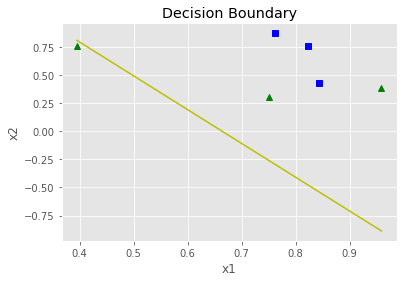

In [352]:
plot_decision_boundary(X_test, y_test, w, b)

In [353]:
print('\n\n The solution to 5b(iii) \n',classification_report(y_test,predict(X_test)))



 The solution to 5b(iii) 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.60      1.00      0.75         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6

